In [6]:
import diffprivlib.models as dp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [16]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Logistic Regression with no privacy

In [19]:
clf = LogisticRegression(solver="lbfgs",max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [20]:
baseline = clf.score(X_test, y_test)
print("Non-private test accuracy: %.2f%%" % (baseline * 100))

Non-private test accuracy: 96.50%


# Differentially private logistic regression

In [21]:
dp_clf = dp.LogisticRegression()
dp_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/diffprivlib/models/logistic_regression.py:221: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
                   data_norm=4974.697268352502)

In [22]:
print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % 
     (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

Differentially private test accuracy (epsilon=1.00): 33.57%


In [23]:
dp_clf = dp.LogisticRegression(epsilon=float("inf"), data_norm=1e5)
dp_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/diffprivlib/models/logistic_regression.py:394: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number of iterations.", ConvergenceWarning)


LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (inf, 0)]),
                   data_norm=100000.0, epsilon=inf)

In [24]:
print("Agreement between non-private and differentially private (epsilon=inf) classifiers: %.2f%%" % 
     (dp_clf.score(X_test, clf.predict(X_test)) * 100))

Agreement between non-private and differentially private (epsilon=inf) classifiers: 99.30%


# Comparing accuracy of two classifiers

In [26]:
import matplotlib.pyplot as plt
import pickle

In [52]:
accuracy = []
epsilons = np.logspace(-1, 1, 500) # start less than 1 and end above 1

for eps in epsilons:
    dp_clf = dp.LogisticRegression(epsilon=eps, data_norm=100,max_iter=10000)
    dp_clf.fit(X_train, y_train)
    accuracy.append(dp_clf.score(X_test, y_test))

In [53]:
import pickle

pickle.dump((epsilons, baseline, accuracy), open("lr_accuracy_500.p", "wb" ) )

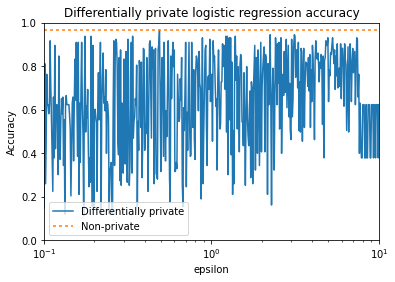

In [54]:
epsilons, baseline, accuracy = pickle.load(open("lr_accuracy_500.p", "rb"))

plt.semilogx(epsilons, accuracy, label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * baseline, dashes=[2,2], label="Non-private")
plt.title("Differentially private logistic regression accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=3)
plt.show()